<a href="https://colab.research.google.com/github/barroso2501/GIS_MapBiomas/blob/main/Reclass_MapBiomas_%26_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
import os
import numpy as np
import rasterio
from rasterio.enums import Resampling
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Definir caminho da pasta no Google Drive
folder_path = "/content/drive/MyDrive/MapBiomas_AMZ"  # Modifique conforme sua pasta no Drive

# Listar arquivos GeoTIFF na pasta
tif_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif') and f.startswith('mapbiomas_')])
#tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif') and f.startswith('mapbiomas_')]

# Criar rasters binários para soja e natureza
for file in tif_files:
    year = file.split('_')[-1].split('.')[0]  # Extrai o ano do nome do arquivo
    file_path = os.path.join(folder_path, file)

    # Abrir o raster original
    with rasterio.open(file_path) as src:
        profile = src.profile  # Pega metadados do raster
        data = src.read(1)  # Lê a primeira (e única) banda

        # Criar máscara binária para soja (39)
        #soja_bin = np.where(data == 39, 1, 0).astype(np.uint8)

        # Criar máscara binária para classes naturais (3, 4, 11, 12)
        natureza_bin = np.where(np.isin(data, [3, 4, 11, 12]), 1, 0).astype(np.uint8)

        # Atualizar o perfil para salvar como uint8 (valores 0 ou 1)
        profile.update(dtype=rasterio.uint8, count=1, compress='lzw')

        # Salvar o raster binário da soja
        #soja_output_path = os.path.join(folder_path, f"soja_{year}.tif")
        #with rasterio.open(soja_output_path, 'w', **profile) as dst:
            #dst.write(soja_bin, 1)

        # Salvar o raster binário das classes naturais
        natureza_output_path = os.path.join(folder_path, f"natureza_{year}.tif")
        with rasterio.open(natureza_output_path, 'w', **profile) as dst:
            dst.write(natureza_bin, 1)

    print(f"Processado: {file} -> soja_{year}.tif e natureza_{year}.tif")

print("Processamento concluído!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processado: mapbiomas_1985.tif -> soja_1985.tif e natureza_1985.tif
Processado: mapbiomas_1986.tif -> soja_1986.tif e natureza_1986.tif
Processado: mapbiomas_1987.tif -> soja_1987.tif e natureza_1987.tif
Processado: mapbiomas_1988.tif -> soja_1988.tif e natureza_1988.tif
Processado: mapbiomas_1989.tif -> soja_1989.tif e natureza_1989.tif
Processado: mapbiomas_1990.tif -> soja_1990.tif e natureza_1990.tif
Processado: mapbiomas_1991.tif -> soja_1991.tif e natureza_1991.tif
Processado: mapbiomas_1992.tif -> soja_1992.tif e natureza_1992.tif
Processado: mapbiomas_1993.tif -> soja_1993.tif e natureza_1993.tif
Processado: mapbiomas_1994.tif -> soja_1994.tif e natureza_1994.tif
Processado: mapbiomas_1995.tif -> soja_1995.tif e natureza_1995.tif
Processado: mapbiomas_1996.tif -> soja_1996.tif e natureza_1996.tif
Processado: mapbiomas_1997.tif -> soja_1997.tif e natur

In [ ]:
test_file = os.path.join(folder_path, "mapbiomas_1985.tif")  # Escolha um dos arquivos ignorados

try:
    with rasterio.open(test_file) as src:
        print(f"Arquivo {test_file} lido com sucesso!")
        print(f"Perfil: {src.profile}")  # Exibe metadados do raster
except Exception as e:
    print(f"Erro ao abrir {test_file}: {e}")


Arquivo /content/drive/MyDrive/MapBiomas_Cer2/mapbiomas_1985.tif lido com sucesso!
Perfil: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 37108, 'height': 15082, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0002694945852358564, 0.0, -57.000260734065535,
       0.0, -0.0002694945852358564, -13.999974208417505), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


Processado: 2000, pixels atualizados: 38718288
Processado: 2001, pixels atualizados: 36656107
Processado: 2002, pixels atualizados: 40407694
Processado: 2003, pixels atualizados: 41526663
Processado: 2004, pixels atualizados: 47381412
Processado: 2005, pixels atualizados: 52057826
Processado: 2006, pixels atualizados: 53313583
Processado: 2007, pixels atualizados: 49736434
Processado: 2008, pixels atualizados: 48453522
Processado: 2009, pixels atualizados: 49684497
Processado: 2010, pixels atualizados: 51803202
Processado: 2011, pixels atualizados: 50925606
Processado: 2012, pixels atualizados: 54667631
Processado: 2013, pixels atualizados: 54136301
Processado: 2014, pixels atualizados: 57212438
Processado: 2015, pixels atualizados: 60935062
Processado: 2016, pixels atualizados: 59894097
Processado: 2017, pixels atualizados: 68787977
Processado: 2018, pixels atualizados: 71401167
Processado: 2019, pixels atualizados: 72948794
Processado: 2020, pixels atualizados: 69227627
Processado: 2

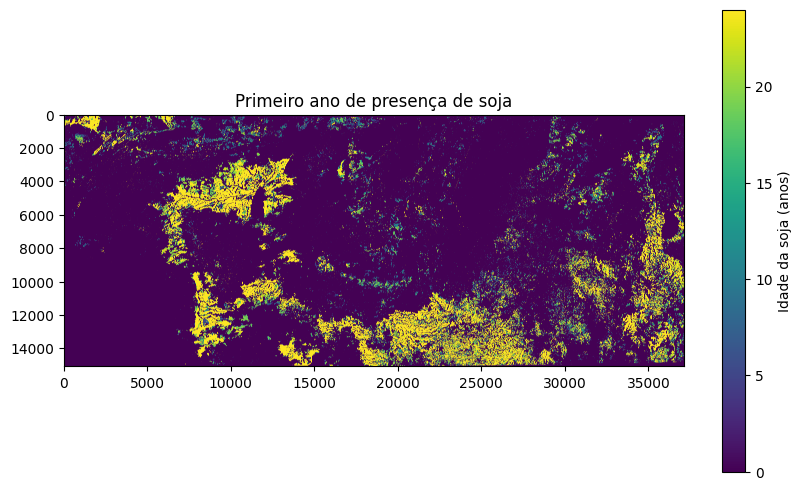

Raster de idade da soja criado com sucesso!


In [ ]:
#novo raster idade soja
import rasterio
import numpy as np
import os
from rasterio.enums import Resampling
import matplotlib.pyplot as plt

# Caminho da pasta com os rasters
raster_folder = "/content/drive/MyDrive/MapBiomas_Cer2/"

# Listar os arquivos que seguem o padrão soy_binary_xxxx.tif
raster_files = [os.path.join(raster_folder, f) for f in os.listdir(raster_folder) if f.startswith("soja_") and f.endswith(".tif")]
raster_files.sort()  # Ordenar os arquivos por nome (ano)

# Definir intervalo de anos
anos = list(range(1985, 2024))  # 1985 a 2023
num_anos = len(anos)

# Abrir o primeiro raster para definir metadados
with rasterio.open(raster_files[0]) as src:
    meta = src.meta.copy()
    altura, largura = src.shape

# Criar um array para armazenar a idade da soja
idade_soja = np.zeros((altura, largura), dtype=np.uint8)

# Percorrer os rasters na ordem cronológica
for i, raster_path in enumerate(raster_files):
    ano = anos[i]
    idade_atual = num_anos - i  # 1985 tem idade 39, 2023 tem idade 1

    with rasterio.open(raster_path) as src:
        img = src.read(1)

        # Atualizar idade da soja onde houver presença (1) e ainda não foi atribuído um valor
        idade_soja[(img == 1) & (idade_soja == 0)] = idade_atual

    print(f"Processado: {ano}, pixels atualizados: {np.sum(img == 1)}")

# Atualizar metadados
meta.update({
    "dtype": 'uint8',
    "count": 1,
    "nodata": 0
})

# Caminho para salvar o raster final
output_raster_path = os.path.join(raster_folder, "first_soy_year.tif")

# Salvar raster de idade da soja
with rasterio.open(output_raster_path, "w", **meta) as dst:
    dst.write(idade_soja, 1)

# Exibir resultado final
plt.figure(figsize=(10, 6))
plt.imshow(idade_soja, cmap='viridis')
plt.colorbar(label="Idade da soja (anos)")
plt.title("Primeiro ano de presença de soja")
plt.show()

print("Raster de idade da soja criado com sucesso!")


Processado: 1986, pixels de desmatamento identificados: 2292558
Processado: 1987, pixels de desmatamento identificados: 1684808
Processado: 1988, pixels de desmatamento identificados: 1563989
Processado: 1989, pixels de desmatamento identificados: 1805217
Processado: 1990, pixels de desmatamento identificados: 1338112
Processado: 1991, pixels de desmatamento identificados: 1635097
Processado: 1992, pixels de desmatamento identificados: 2399940
Processado: 1993, pixels de desmatamento identificados: 2249671
Processado: 1994, pixels de desmatamento identificados: 2882770
Processado: 1995, pixels de desmatamento identificados: 3982473
Processado: 1996, pixels de desmatamento identificados: 2958712
Processado: 1997, pixels de desmatamento identificados: 2901326
Processado: 1998, pixels de desmatamento identificados: 3415759
Processado: 1999, pixels de desmatamento identificados: 4259566
Processado: 2000, pixels de desmatamento identificados: 3150282
Processado: 2001, pixels de desmatamento

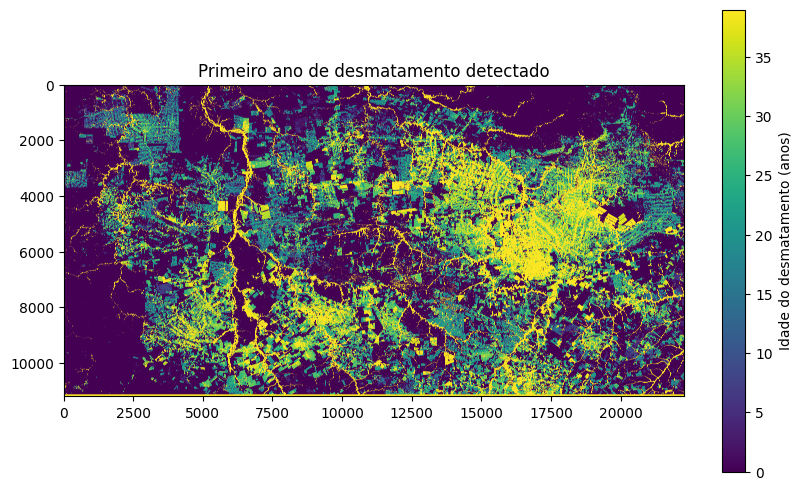

Raster de idade do desmatamento criado com sucesso!


In [ ]:
#novo raster idade desmatamento
import rasterio
import numpy as np
import os
import pandas as pd
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
from rasterio.transform import xy

# Caminhos dos arquivos
raster_folder = "/content/drive/MyDrive/MapBiomas_AMZ/"
natural_vegetation_files = sorted([os.path.join(raster_folder, f) for f in os.listdir(raster_folder) if f.startswith("natureza_") and f.endswith(".tif")])
output_deforestation_age_path = os.path.join(raster_folder, "deforestation_age_colab.tif")

# Definir intervalo de anos
anos = list(range(1985, 2024))  # 1985 a 2023
num_anos = len(anos)

# Abrir o primeiro raster para definir metadados
with rasterio.open(natural_vegetation_files[0]) as src:
    meta = src.meta.copy()
    altura, largura = src.shape

# Criar um array para armazenar a idade do desmatamento
idade_desmate = np.zeros((altura, largura), dtype=np.uint8)

# Inicializar com 39 os pixels que já eram 0 em 1985 (desmatados antes do início da série)
with rasterio.open(natural_vegetation_files[0]) as src:
    img_anterior = src.read(1)
    idade_desmate[img_anterior == 0] = 39

# Percorrer a série temporal de 1985 a 2023
for i in range(1, num_anos):
    ano_atual = anos[i]
    idade_atual = num_anos - i  # 1985 tem idade 39, 2023 tem idade 1

    with rasterio.open(natural_vegetation_files[i]) as src:
        img_atual = src.read(1)

        # Detectar mudança de 1 -> 0 (desmatamento)
        desmatado = (img_anterior == 1) & (img_atual == 0) & (idade_desmate == 0)
        idade_desmate[desmatado] = idade_atual

        # Atualizar img_anterior para a próxima iteração
        img_anterior = img_atual.copy()

    print(f"Processado: {ano_atual}, pixels de desmatamento identificados: {np.sum(desmatado)}")

# Atualizar metadados
meta.update({
    "dtype": 'uint8',
    "count": 1,
    "nodata": 0
})

# Salvar raster de idade do desmatamento
with rasterio.open(output_deforestation_age_path, "w", **meta) as dst:
    dst.write(idade_desmate, 1)

# Exibir resultado final
plt.figure(figsize=(10, 6))
plt.imshow(idade_desmate, cmap='viridis')
plt.colorbar(label="Idade do desmatamento (anos)")
plt.title("Primeiro ano de desmatamento detectado")
plt.show()

print("Raster de idade do desmatamento criado com sucesso!")


Raster idade da soja carregado. Dimensões: (11193, 22264)
Raster idade do desmatamento reamostrado. Dimensões: (11193, 22264)
Valores únicos no raster de idade do desmatamento: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Valores únicos no raster de idade da soja: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Número total de pixels identificados como 1: 3478214


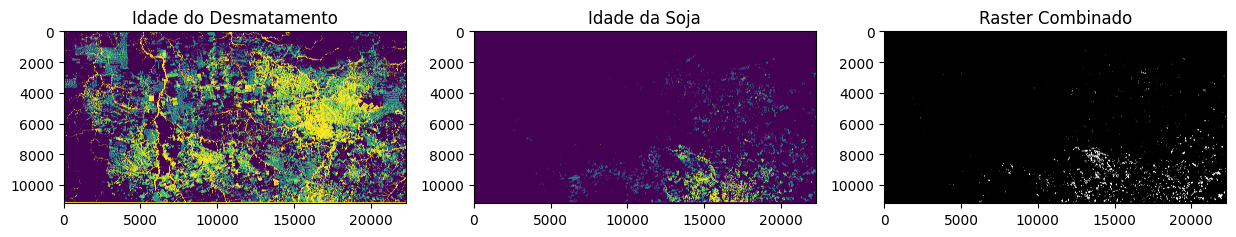

Raster combinado criado com sucesso!


In [ ]:
import rasterio
import numpy as np
import os
from rasterio.enums import Resampling
import matplotlib.pyplot as plt

# Caminhos dos arquivos
raster_folder = "/content/drive/MyDrive/MapBiomas_AMZ/"
idade_desmate_path = os.path.join(raster_folder, "deforestation_age_colab.tif")
idade_soja_path = os.path.join(raster_folder, "first_soy_year.tif")
output_combined_path = os.path.join(raster_folder, "combined_raster.tif")

# Abrir o raster de idade da soja para definir os parâmetros do output
with rasterio.open(idade_soja_path) as soja_src:
    soja_array = soja_src.read(1)
    soja_meta = soja_src.meta.copy()
    soja_transform = soja_src.transform
    print("Raster idade da soja carregado. Dimensões:", soja_array.shape)

# Ajustar o raster de idade do desmatamento para coincidir com o de soja
with rasterio.open(idade_desmate_path) as desmate_src:
    desmate_array = desmate_src.read(1, out_shape=(1, soja_src.height, soja_src.width), resampling=Resampling.nearest)
    print("Raster idade do desmatamento reamostrado. Dimensões:", desmate_array.shape)

    # Verificar valores únicos em cada raster
    print("Valores únicos no raster de idade do desmatamento:", np.unique(desmate_array))
    print("Valores únicos no raster de idade da soja:", np.unique(soja_array))

    # Aplicar regras de consistência (somente valores entre 1 e 20)
    desmate_valid = (desmate_array >= 1) & (desmate_array <= 20)
    soja_valid = (soja_array >= 1) & (soja_array <= 20)

    # Criar raster combinado
    combined_array = np.where(desmate_valid & soja_valid, 1, 0)
    print("Número total de pixels identificados como 1:", np.sum(combined_array))

    # Visualizar os rasters para inspeção
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(desmate_array, cmap='viridis')
    ax[0].set_title("Idade do Desmatamento")
    ax[1].imshow(soja_array, cmap='viridis')
    ax[1].set_title("Idade da Soja")
    ax[2].imshow(combined_array, cmap='gray')
    ax[2].set_title("Raster Combinado")
    plt.show()

    # Atualizar metadados
    soja_meta.update({
        "dtype": 'uint8',
        "count": 1,
        "nodata": 0
    })

    # Salvar raster combinado
    with rasterio.open(output_combined_path, "w", **soja_meta) as combined_dst:
        combined_dst.write(combined_array.astype(np.uint8), 1)

print("Raster combinado criado com sucesso!")


Raster idade da soja carregado. Dimensões: (11193, 22264)
Raster idade do desmatamento reamostrado. Dimensões: (11193, 22264)
Valores únicos no raster de idade do desmatamento: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Valores únicos no raster de idade da soja: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Número total de pixels identificados como 1: 3478214


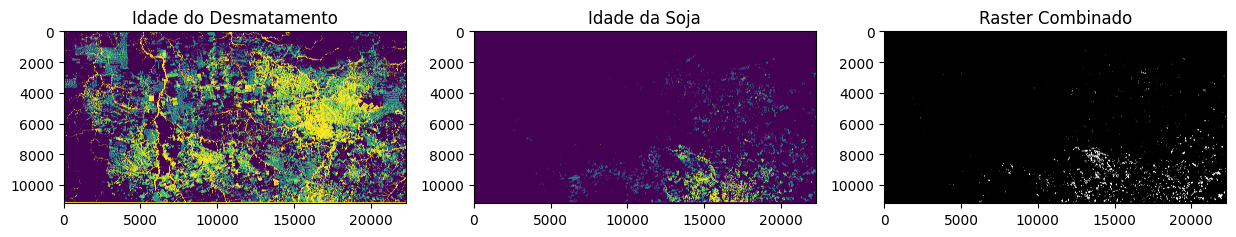

Raster combinado criado com sucesso!
CSV salvo com 3000 pontos aleatórios válidos: /content/drive/MyDrive/MapBiomas_AMZ/random_points.csv


In [ ]:
import rasterio
import numpy as np
import os
import pandas as pd
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
from rasterio.transform import xy
from scipy.spatial import cKDTree

# Caminhos dos arquivos
raster_folder = "/content/drive/MyDrive/MapBiomas_AMZ/"
idade_desmate_path = os.path.join(raster_folder, "deforestation_age_colab.tif")
idade_soja_path = os.path.join(raster_folder, "first_soy_year.tif")
output_combined_path = os.path.join(raster_folder, "combined_raster.tif")
output_csv_path = os.path.join(raster_folder, "random_points.csv")

# Abrir o raster de idade da soja para definir os parâmetros do output
with rasterio.open(idade_soja_path) as soja_src:
    soja_array = soja_src.read(1)
    soja_meta = soja_src.meta.copy()
    soja_transform = soja_src.transform
    print("Raster idade da soja carregado. Dimensões:", soja_array.shape)

# Ajustar o raster de idade do desmatamento para coincidir com o de soja
with rasterio.open(idade_desmate_path) as desmate_src:
    desmate_array = desmate_src.read(1, out_shape=(1, soja_src.height, soja_src.width), resampling=Resampling.nearest)
    print("Raster idade do desmatamento reamostrado. Dimensões:", desmate_array.shape)

    # Verificar valores únicos em cada raster
    print("Valores únicos no raster de idade do desmatamento:", np.unique(desmate_array))
    print("Valores únicos no raster de idade da soja:", np.unique(soja_array))

    # Aplicar regras de consistência (somente valores entre 1 e 20)
    desmate_valid = (desmate_array >= 1) & (desmate_array <= 20)
    soja_valid = (soja_array >= 1) & (soja_array <= 20)

    # Criar raster combinado
    combined_array = np.where(desmate_valid & soja_valid, 1, 0)
    print("Número total de pixels identificados como 1:", np.sum(combined_array))

    # Visualizar os rasters para inspeção
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(desmate_array, cmap='viridis')
    ax[0].set_title("Idade do Desmatamento")
    ax[1].imshow(soja_array, cmap='viridis')
    ax[1].set_title("Idade da Soja")
    ax[2].imshow(combined_array, cmap='gray')
    ax[2].set_title("Raster Combinado")
    plt.show()

    # Atualizar metadados
    soja_meta.update({
        "dtype": 'uint8',
        "count": 1,
        "nodata": 0
    })

    # Salvar raster combinado
    with rasterio.open(output_combined_path, "w", **soja_meta) as combined_dst:
        combined_dst.write(combined_array.astype(np.uint8), 1)

print("Raster combinado criado com sucesso!")

# Gerar pontos aleatórios
num_points = 3000
valid_pixels = np.column_stack(np.where(combined_array == 1))
if len(valid_pixels) < num_points:
    raise ValueError("Não há pixels suficientes com valor 1 para sortear 3.000 pontos.")

selected_indices = np.random.choice(len(valid_pixels), num_points, replace=False)
selected_points = valid_pixels[selected_indices]

# Converter índices para coordenadas geográficas
coords = [xy(soja_transform, row, col) for row, col in selected_points]

# Extrair valores de idade do desmatamento e idade da soja
idade_desmate_values = desmate_array[selected_points[:, 0], selected_points[:, 1]]
idade_soja_values = soja_array[selected_points[:, 0], selected_points[:, 1]]

# Criar DataFrame e salvar CSV
df = pd.DataFrame({
    "longitude": [c[0] for c in coords],
    "latitude": [c[1] for c in coords],
    "Idade_desmate": idade_desmate_values,
    "Idade_soja": idade_soja_values
})

df.to_csv(output_csv_path, index=False)

print(f"CSV salvo com {len(df)} pontos aleatórios válidos: {output_csv_path}")
